In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb

train = pd.read_csv('sales_train.csv.gz')
test = pd.read_csv('test.csv.gz')
item_c = pd.read_csv('item_categories.csv')
items = pd.read_csv('items.csv')
shops = pd.read_csv('shops.csv')

train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


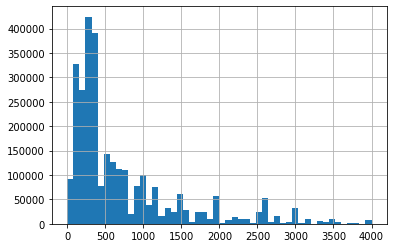

In [4]:
# price
_ = train.item_price.hist(bins=50, range=(0,4000))
d = pd.date_range('1/1/2013','10/12/2015')
years_months = sorted(list(set(list(map(lambda x: (x.year, x.month), d)))))
date_block_map = lambda x: years_months.index((x.year, x.month))

In [176]:
sold_per_day = train.drop('item_price',axis=1).groupby(['shop_id','item_id','date_block_num'])
item_cnt_agg = sold_per_day.agg(np.sum).reset_index()
item_cnt_agg_index = item_cnt_agg.set_index(['shop_id', 'item_id','date_block_num'])

In [177]:
change_tuple = lambda tup, num_blocks: list(zip([tup[0]] * num_blocks, [tup[1]] * num_blocks, np.arange(num_blocks)))
fill_dates = lambda x: x.reindex(change_tuple(list(x.index)[0], 33),axis='index')
item_cnt_agg_index = item_cnt_agg_index.iloc[:1,:].groupby(['shop_id','item_id','date_block_num']).apply(fill_dates)

In [183]:
# item_cnt_agg_index_ = item_cnt_agg_index.reindex(,axis='index')
item_cnt_agg_index.index.name = ('a','b','c','shop_id','item_id','date_block_num')
item_cnt_agg_index.drop(labels=['a','b','c'],axis=0)

KeyError: 'a'

<BarContainer object of 84 artists>

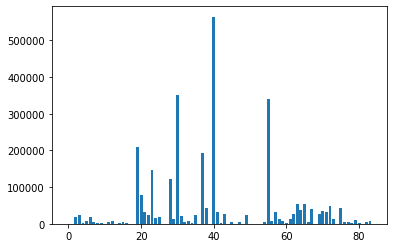

In [14]:
# category counts
id_to_category = dict(zip(items.item_id, items.item_category_id))
cats = np.array(list(map(lambda x: id_to_category[x], train.item_id)))
cat_counts = np.unique(cats,return_counts=True)

plt.bar(cat_counts[0], cat_counts[1])

In [ ]:
# does num item sold vary wildly over shops
num_sold_over_shops = train[['shop_id', 'item_cnt_day']].groupby([train.shop_id]).sum()
_ = num_sold_over_shops.item_cnt_day.hist(bins=10)